In [2]:
#https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
boston = datasets.load_boston()

In [4]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['Price'] = boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [5]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [6]:
print(bos['Price'].mean())#Get average Price
print(bos['Price'].median())#median Price

22.5328063241
21.2


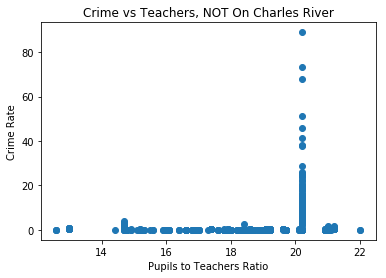

In [7]:
#Crime Rate vs Teachers -- homes not on charles river.

#https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

charles_river = bos.loc[bos['CHAS'] < 1]
y_column = charles_river['CRIM']
x_column = charles_river['PTRATIO']

plt.title("Crime vs Teachers, NOT On Charles River")

plt.xlabel("Pupils to Teachers Ratio")

plt.ylabel("Crime Rate")

plt.scatter(x_column, y_column)
plt.show()

#analysis: There is one spike in crime at or near 1 teacher to 20 students. 
#However, I don't believe this overly explanatory. There does not appear to be 
#much correlation between teachers and crime as the charles river is not a factor.

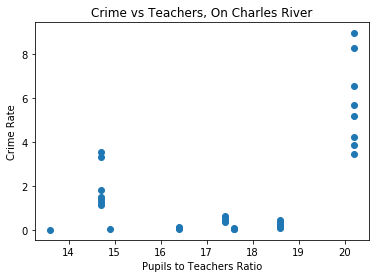

In [8]:
#Crime Rate vs Teachers -- homes on charles river.

charles_river = bos.loc[bos['CHAS'] >= 1]
y_column = charles_river['CRIM']
x_column = charles_river['PTRATIO']

plt.title("Crime vs Teachers, On Charles River")

plt.xlabel("Pupils to Teachers Ratio")

plt.ylabel("Crime Rate")

plt.scatter(x_column, y_column)
plt.show()

#Crime rates appear more volatile for neighborhoods bordering the Charles River.
#According to wikipedia (https://en.wikipedia.org/wiki/Charles_River) - this river
#has a history of pollution, which would explain lower economic development in this 
#area and thus higher crime rate.

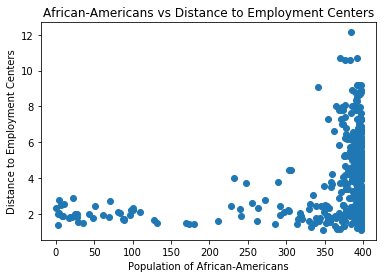

In [9]:
#Empoyment centers vs. Population of African-Americans

employment_opportunity = bos

y_column = employment_opportunity['DIS']
x_column = employment_opportunity['B']

plt.title("African-Americans vs Distance to Employment Centers")

plt.ylabel("Distance to Employment Centers")

plt.xlabel("Population of African-Americans")

plt.scatter(x_column, y_column)
plt.show()

#This is not surprising. Minorities are often at greater risk for economic depression.
#In this case, the greater distance from employment centers seems directly corelated with
#higher populations for African Americans.

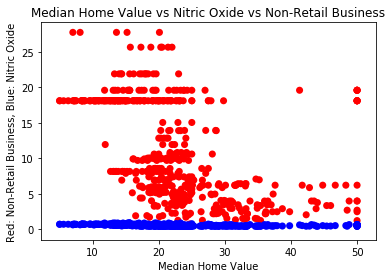

In [10]:
#Median Home value relative to non-retail business and nitric oxide rates.

x_column = bos['NOX']
y_column = bos['INDUS']

z_column = boston['target'] # median home value

plt.title("Median Home Value vs Nitric Oxide vs Non-Retail Business")


plt.scatter(z_column, y_column, s=50, c="red", edgecolor="None") #home value relative to non-retail business
plt.scatter(z_column, x_column, s=50, c="blue", edgecolor="None") #home value relative to nitric oxide

plt.ylabel("Red: Non-Retail Business, Blue: Nitric Oxide")

plt.xlabel("Median Home Value")

plt.show()

#analysis 
#Home values seem non-existant when Nitrous Oxide present. Makes sense - no one
#wants to live near poison.
#Property values also appear lower near industrial areas.

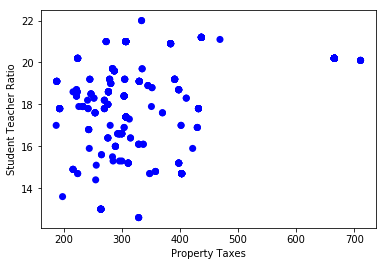

In [11]:
# I am going to analyze teacher to student ratios relative to property tax rates.
#my hypothesis is that areas with higher return on taxes have more teachers.

x_column = bos['TAX']
y_column = bos['PTRATIO']

plt.scatter(x_column, y_column, s=50, c="blue", edgecolor="None") 

plt.xlabel("Property Taxes")

plt.ylabel("Student Teacher Ratio")

plt.show()

#There absolutely appears to be higher teacher to student ratio in areas with higher
#property taxes

#but also there are fewer data points the higher the tax rate.